# Python stats and Plotting Tutorial Assignment
## BSGP 7030

## Import packages necessary for assignment

In [47]:
from matplotlib import pyplot as plt 
import numpy as np 
import pandas as pd
from pandas import plotting
from scipy import stats
import seaborn as sns
from statsmodels.formula.api import ols

# Data Representation and Interaction:
## Learning pandas data-frames

## Read and print data from brain_size.csv

In [48]:
data = pd.read_csv('brain_size.csv', sep=';', na_values='.')
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


## Generate a dataframe from an array 

In [49]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

pd.DataFrame({'t':t, 'sin':sin_t, 'cos':cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


## Manipulating Data 

### Print out data shape, Index, and Gender from bran_size.csv

In [50]:
print(data.shape)

print(data.columns)

print(data['Gender'])

(40, 8)
Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')
0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


### Group VIQ data by gender and print out mean. 

In [51]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


### Print the gender averages of all data 

In [52]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


## Exercise 1

### Mean value for VIQ for the full population 

In [53]:
VIQ_mean = data['VIQ'] 
print(VIQ_mean.mean())

112.35


### Calculate number of males/females included in the study

In [54]:
gender_count = data['Gender'].value_counts()
print(gender_count)

Gender
Female    20
Male      20
Name: count, dtype: int64


### Average MRI_Count for males and females in log units

In [55]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['MRI_Count']:
    print((gender, np.log(value.mean())))

('Female', 13.66776965820175)
('Male', 13.769315194386103)


## Plotting Data

### Plot Weight, Height, and MRI Count on a scatter plot 

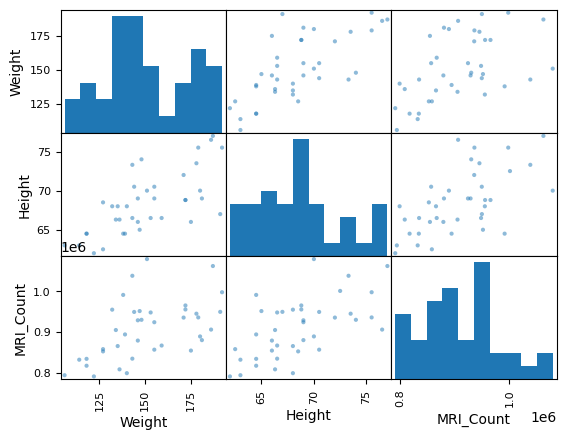

In [57]:
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])
plt.show()

### Plot PIQ, VIQ, and FSIQ on Scatter plot 

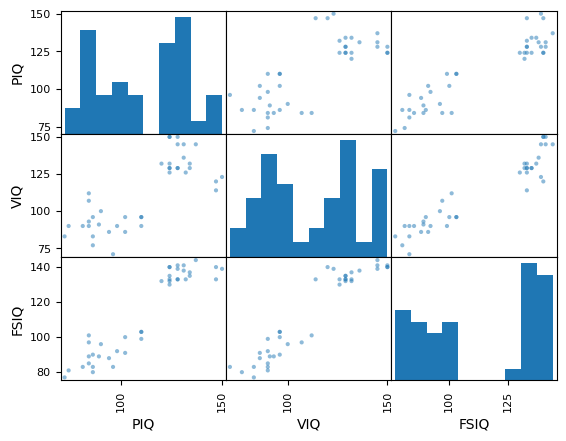

In [59]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])   
plt.show()

## Exercise 2

### Plot previous scatter matrix for males only 

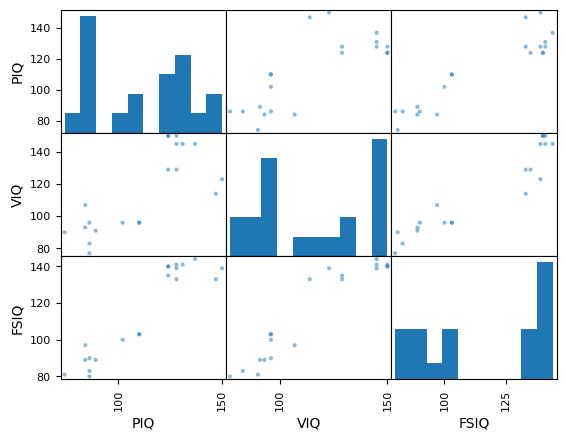

In [63]:
male_data = data[data['Gender'] == 'Male'] 
plotting.scatter_matrix(male_data[['PIQ', 'VIQ', 'FSIQ']]) 
plt.show()

### Plot previous scatter matrix for males only 

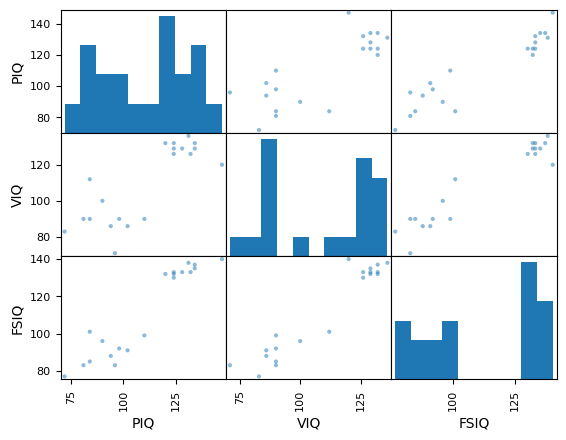

In [64]:
female_data = data[data['Gender'] == 'Female'] 
plotting.scatter_matrix(female_data[['PIQ', 'VIQ', 'FSIQ']])
plt.show()

### There does not seem to be a correlation between gender and the two sub-populations

# Hypothesis testing: Comparing two groups 